In [18]:
import torch
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from torch.utils.data import DataLoader

In [3]:
from preprocess import VerificationDataset, split_eval, OneshotDataset

In [4]:
random.seed(10)

In [5]:
backPath = './data/background'
evalPath = './data/evaluation'

In [6]:
dic_idxs_eval = split_eval(backPath, evalPath)

In [7]:
dic_idxs_eval

{'drawer': {'back': [2, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 19],
  'test': [0, 3, 1, 18],
  'valid': [17, 15, 13, 7]},
 'alphabet': {'test': [16, 15, 10, 2, 7, 11, 5, 0, 6, 19],
  'valid': [1, 3, 4, 8, 9, 12, 13, 14, 17, 18]}}

## Verification Dataset

In [8]:
BackgroundDataset = VerificationDataset(backPath, 6, 
                            dic_idxs_eval['drawer']['back'])

begin loading background dataset to the memory
6 samples are generated.


(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)


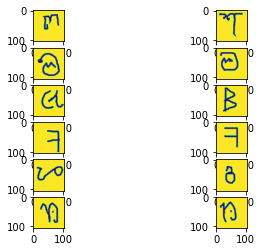

In [9]:
rows = len(BackgroundDataset)
for i in range(1,2*rows,2):
    img1, img2, label = BackgroundDataset[(i-1)/2]
    print(img1.shape, img2.shape)
    ax = plt.subplot(rows, 2, i)
    ax = plt.imshow(img1)
    ax = plt.subplot(rows, 2, i+1)
    ax = plt.imshow(img2)

## One-shot Learning Dataset

In [10]:
EvalDataset = OneshotDataset(evalPath, n_ways=20, idxs_eval=dic_idxs_eval, phase='valid')

begin loading valid dataset to the memory
400 samples are generated.


In [11]:
len(EvalDataset)

400

In [45]:
k = 2

tensor([2.])


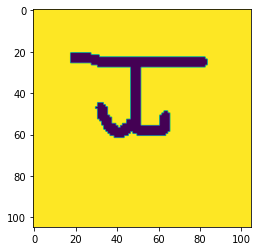

In [46]:
input_img, ways_img, label = EvalDataset[k]
print(label)
plt.imshow(input_img)

(105, 105) 20 tensor([2.])


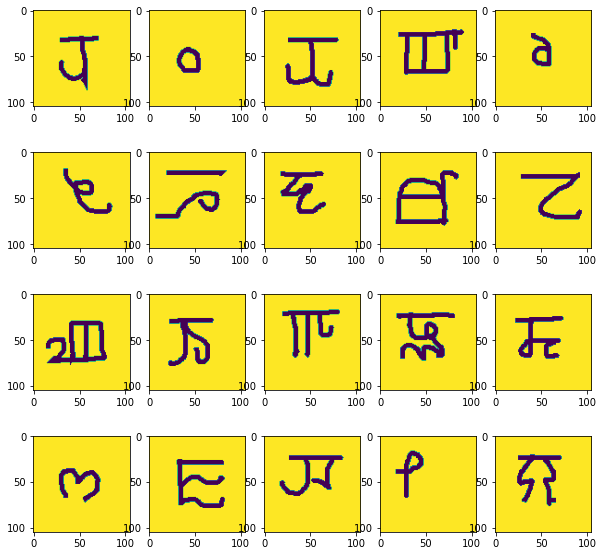

In [47]:
rows = 3
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
print(input_img.shape, len(ways_img), label)
input_img, ways_img, label = EvalDataset[k]
for i in range(4):
    ax = axs[i]
    for j in range(5):
        ax[j].imshow(ways_img[i*5 + j])        

# Check it with the DataLoader

In [49]:
TrainLoader = DataLoader(BackgroundDataset, batch_size = 4, shuffle=True)

In [53]:
EvalLoader = DataLoader(EvalDataset, batch_size = 2, shuffle=False)

In [54]:
next(iter(TrainLoader))

[tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 25

In [55]:
next(iter(EvalLoader))

[tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8),
 {0: tensor([[[255, 255, 255,  ..., 255, 255, 255],
           [255, 255, 255,  ..., 255, 255, 255],
           [255, 255, 255,  ..., 255, 255, 255],
           ...,
           [255, 255, 255,  ..., 255, 255, 255],
           [255, 255, 255,  ..., 255, 255, 255],
           [255, 255, 255,  ..., 255, 255, 255]],
  
          [[255, 255, 255,  ..., 255, 255, 255],
   